In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dt = np.dtype([('instance_no', int),
               ('exp_no', int),
               ('method', int), # 1 = white box, 2 = euclidean_PCA, 3 = hog, 4 = euclidean_PCA category, 5 = hog category, 6 = ais
               ('pca_n', int),
               ('percentage_of_data', float),
               ('percentile', float),
               ('mc_euclidean_no_batches', int), # stuff
               ('mc_hog_no_batches', int), # stuff
               ('sigma_ais', float),
               ('mc_attack_log', float),
               ('mc_attack_eps', float),
               ('mc_attack_frac', float), 
               ('mc_attack_log_50', float), 
               ('mc_attack_eps_50', float),
               ('mc_attack_frac_50', float),
               ('white_box_50', float),
               ('white_box_11', float),
               ('ais_50', float),
               ('ais_acc_rate_50', float),
              ])

In [2]:
data = pd.DataFrame(np.loadtxt('CONSOLIDATED_MC_Attacks_MNIST.csv', dtype=dt))

data = data.assign(mem_inf_adv_mc_log = lambda x: (x.mc_attack_log_50-0.5)*2)
data = data.assign(mem_inf_adv_mc_ones = lambda x: (x.mc_attack_eps_50-0.5)*2)
data = data.assign(mem_inf_adv_wb = lambda x: (x.white_box_50-0.5)*2)
data = data.assign(mem_inf_adv_ais = lambda x: (x.ais_50-0.5)*2)

def convert_to_set_prob(x):
    prob = np.zeros((len(x),))
    for i in range(len(x)):
        if x[i] > 0:
            prob[i] = 1
        elif x[i] == 0:
            prob[i] = 0.5
        elif x[i] < 0:
            prob[i] = 0
    return prob

data = data.assign(set_accuracy_mc_log = lambda x: convert_to_set_prob(x.mem_inf_adv_mc_log))
data = data.assign(set_accuracy_mc_ones = lambda x: convert_to_set_prob(x.mem_inf_adv_mc_ones))
data = data.assign(set_accuracy_wb = lambda x: convert_to_set_prob(x.mem_inf_adv_wb))
data = data.assign(set_accuracy_ais = lambda x: convert_to_set_prob(x.mem_inf_adv_ais))

data = data.assign(set_mem_inf_adv_mc_log = lambda x: 2*x.set_accuracy_mc_log-1)
data = data.assign(set_mem_inf_adv_mc_ones = lambda x: 2*x.set_accuracy_mc_ones-1)
data = data.assign(set_mem_inf_adv_wb = lambda x: 2*x.set_accuracy_wb-1)
data = data.assign(set_mem_inf_adv_ais = lambda x: 2*x.set_accuracy_ais-1)

white_box = data[data.method == 1]
pca = data[data.method == 2]
hog = data[data.method == 3]
pca_cat = data[data.method == 4]
hog_cat = data[data.method == 5]



In [3]:
data = pd.DataFrame(np.loadtxt('AIS_SIGMA_0.025.csv', dtype=dt))

# ais sign correction
data.loc[data.method == 6,('ais_50')] = 1-data[data.method == 6].ais_50
#data.loc[data.method == 1,('white_box_50')] = 1-data[data.method == 1].white_box_50

data = data.assign(mem_inf_adv_mc_log = lambda x: (x.mc_attack_log_50-0.5)*2)
data = data.assign(mem_inf_adv_mc_ones = lambda x: (x.mc_attack_eps_50-0.5)*2)
data = data.assign(mem_inf_adv_wb = lambda x: (x.white_box_50-0.5)*2)
data = data.assign(mem_inf_adv_ais = lambda x: (x.ais_50-0.5)*2)

def convert_to_set_prob(x):
    prob = np.zeros((len(x),))
    for i in range(len(x)):
        if x[i] > 0:
            prob[i] = 1
        elif x[i] == 0:
            prob[i] = 0.5
        elif x[i] < 0:
            prob[i] = 0
    return prob

data = data.assign(set_accuracy_mc_log = lambda x: convert_to_set_prob(x.mem_inf_adv_mc_log))
data = data.assign(set_accuracy_mc_ones = lambda x: convert_to_set_prob(x.mem_inf_adv_mc_ones))
data = data.assign(set_accuracy_wb = lambda x: convert_to_set_prob(x.mem_inf_adv_wb))
data = data.assign(set_accuracy_ais = lambda x: convert_to_set_prob(x.mem_inf_adv_ais))

data = data.assign(set_mem_inf_adv_mc_log = lambda x: 2*x.set_accuracy_mc_log-1)
data = data.assign(set_mem_inf_adv_mc_ones = lambda x: 2*x.set_accuracy_mc_ones-1)
data = data.assign(set_mem_inf_adv_wb = lambda x: 2*x.set_accuracy_wb-1)
data = data.assign(set_mem_inf_adv_ais = lambda x: 2*x.set_accuracy_ais-1)

ais = data[data.method == 6]



# White Box

In [4]:
len(white_box)

80

In [5]:
print(white_box.mem_inf_adv_wb.mean())
print(white_box.set_mem_inf_adv_wb.mean())
print(white_box.set_accuracy_wb.mean())

0.03000000000000001
0.2
0.6


# AIS

In [6]:
print(ais.mem_inf_adv_ais.mean())
print(ais.set_accuracy_ais.mean())

0.007692307692307702
0.532051282051282


# PCA per Category
0.1 mc_attack_log_50

In [7]:
pca_cat.groupby(['percentile']).mean()[['mc_attack_log_50','mc_attack_eps_50','set_accuracy_mc_log','set_accuracy_mc_ones']]*100

,mc_attack_log_50,mc_attack_eps_50,set_accuracy_mc_log,set_accuracy_mc_ones
percentile,,,,
-1.00,51.6125,51.6125,70.00,70.000
0.01,51.6500,51.2000,68.75,61.875
0.10,51.4625,51.5250,66.25,70.000
1.00,51.2000,51.1625,61.25,63.125


In [8]:
pca_cat.groupby(['percentile']).count()[['set_accuracy_mc_log','set_accuracy_mc_ones']]

,set_accuracy_mc_log,set_accuracy_mc_ones
percentile,,
-1.00,80,80
0.01,80,80
0.10,80,80
1.00,80,80


In [9]:
pca_cat_opt_perc = pca_cat[pca_cat.percentile == -1]
print(len(pca_cat_opt_perc))

print(pca_cat_opt_perc.mem_inf_adv_mc_log.mean())
print(pca_cat_opt_perc.mem_inf_adv_mc_ones.mean())

print(pca_cat_opt_perc.set_accuracy_mc_ones.mean())
print(pca_cat_opt_perc.set_accuracy_mc_log.mean())

#print(len(pca_opt_perc[pca_opt_perc.mc_attack_log_50>0.5])/len(pca_opt_perc))
#print(len(pca_opt_perc[pca_opt_perc.mc_attack_eps_50>0.5])/len(pca_opt_perc))

80
0.03225000000000002
0.03225000000000002
0.7
0.7


# Histogram of Gradients (HOG) per category
0.01 Epsilon Method?

In [10]:
hog_cat.groupby(['percentile']).mean()[['mc_attack_log_50','mc_attack_eps_50','set_accuracy_mc_log','set_accuracy_mc_ones']]*100

,mc_attack_log_50,mc_attack_eps_50,set_accuracy_mc_log,set_accuracy_mc_ones
percentile,,,,
-1.00,50.589041,50.589041,57.534247,57.534247
0.01,50.397260,50.109589,59.589041,57.534247
0.10,50.657534,50.452055,57.534247,54.109589
1.00,50.315068,50.383562,52.739726,55.479452


In [11]:
hog_cat_opt_perc = hog_cat[hog_cat.percentile == -1]

print(hog_cat_opt_perc.mem_inf_adv_mc_log.mean())
print(hog_cat_opt_perc.mem_inf_adv_mc_ones.mean())

print(hog_cat_opt_perc.set_mem_inf_adv_mc_log.mean())
print(hog_cat_opt_perc.set_accuracy_mc_ones.mean())

0.011780821917808233
0.011780821917808233
0.1506849315068493
0.5753424657534246


[51.5   50.385 51.613 50.589]
[0.608 0.561 0.378 0.405]
[60.    53.205 70.    57.534]
[5.217 5.108 4.92  5.402]


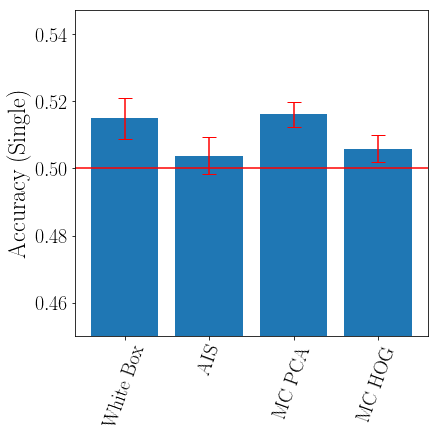

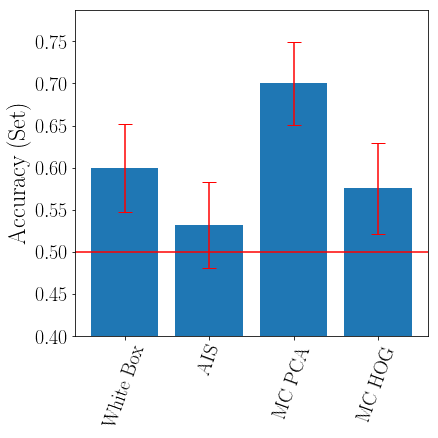

In [16]:
def calc_error(data):
    return data.std()/np.sqrt(len(data))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 20})

f = plt.figure(figsize=(7, 7))
ax = plt.subplot()

names = ['White Box', 'AIS','MC PCA', 'MC HOG']
N = len(names)
ind = np.arange(N)

y = [white_box.white_box_50.mean(), 
                               ais.ais_50.mean(), 
                               #pca_opt_perc.mc_attack_log_50.mean(),
                               #pca_opt_perc.mc_attack_eps_50.mean(),
                               #hog_opt_perc.mc_attack_log_50.mean(),
                               #hog_opt_perc.mc_attack_eps_50.mean(),
                               #pca_cat_opt_perc.mc_attack_log_50.mean(),
                               pca_cat_opt_perc.mc_attack_eps_50.mean(),
                               #hog_cat_opt_perc.mc_attack_log_50.mean(),
                               hog_cat_opt_perc.mc_attack_eps_50.mean()]

print(np.round(100*np.array(y),3))

rects1 = ax.bar(ind,  y)

e = [calc_error(white_box.white_box_50), 
                               calc_error(ais.ais_50), 
                               #calc_error(pca_opt_perc.mc_attack_log_50), 
                               #calc_error(pca_opt_perc.mc_attack_eps_50), 
                               #calc_error(hog_opt_perc.mc_attack_log_50), 
                               #calc_error(hog_opt_perc.mc_attack_eps_50),
                               #calc_error(pca_cat_opt_perc.mc_attack_log_50), 
                               calc_error(pca_cat_opt_perc.mc_attack_eps_50), 
                               #calc_error(hog_cat_opt_perc.mc_attack_log_50), 
                               calc_error(hog_cat_opt_perc.mc_attack_eps_50)]

print(np.round(100*np.array(e),3))

np.save('y_single_cgan',y)
np.save('e_single_cgan',e)

plt.errorbar(ind, y, e, color='r', linestyle='None', capsize=7)


plt.ylim(ymin=0.45)
plt.axhline(y=0.5, color='r', linestyle='-')

plt.ylabel('Accuracy (Single)', fontsize='large')

ax.set_xticks(ind)
plt.setp(ax.get_xticklabels(), rotation='70')

ax.set_xticklabels(names)

plt.tight_layout(pad=2, w_pad=2, h_pad=2)

f = plt.figure(figsize=(7, 7))
ax = plt.subplot()

ind = np.arange(N)

y = [white_box.set_accuracy_wb.mean(), 
                               ais.set_accuracy_ais.mean(), 
                               #pca_opt_perc.set_accuracy_mc_log.mean(),
                               #pca_opt_perc.set_accuracy_mc_ones.mean(),
                               #hog_opt_perc.set_accuracy_mc_log.mean(),
                               #hog_opt_perc.set_accuracy_mc_ones.mean(),
                               #pca_cat_opt_perc.set_accuracy_mc_log.mean(),
                               pca_cat_opt_perc.set_accuracy_mc_ones.mean(),
                               #hog_cat_opt_perc.set_accuracy_mc_log.mean(),
                               hog_cat_opt_perc.set_accuracy_mc_ones.mean()]

print(np.round(100*np.array(y),3))

rects1 = ax.bar(ind, y)

e = [calc_error(white_box.set_accuracy_wb), 
                               calc_error(ais.set_accuracy_ais), 
                               #calc_error(pca_opt_perc.set_accuracy_mc_log), 
                               #calc_error(pca_opt_perc.set_accuracy_mc_ones), 
                               #calc_error(hog_opt_perc.set_accuracy_mc_log), 
                               #calc_error(hog_opt_perc.set_accuracy_mc_ones),
                               #calc_error(pca_cat_opt_perc.set_accuracy_mc_log), 
                               calc_error(pca_cat_opt_perc.set_accuracy_mc_ones), 
                               #calc_error(hog_cat_opt_perc.set_accuracy_mc_log), 
                               calc_error(hog_cat_opt_perc.set_accuracy_mc_ones)]

print(np.round(100*np.array(e),3))

np.save('y_set_cgan',y)
np.save('e_set_cgan',e)

plt.errorbar(ind, y, e, color='r', linestyle='None', capsize=7)

plt.ylabel('Accuracy (Set)', fontsize='large')

plt.ylim(ymin=0.4)
plt.axhline(y=0.5, color='r', linestyle='-')

ax.set_xticks(ind)
plt.setp(ax.get_xticklabels(), rotation='70')
ax.set_xticklabels(names)

plt.tight_layout(pad=2, w_pad=2, h_pad=2)
plt.savefig('GAN_MNIST_Mem_Inf_10_Perc.pgf', bbox_inches="tight")
    
plt.show()

In [14]:
print(len(pca_cat_opt_perc))
print(len(hog_cat_opt_perc))
print(len(ais))
print(len(white_box))

80
73
78
80


In [15]:
white_box.mean()[['set_accuracy_mc_log','set_accuracy_mc_ones']]*100

set_accuracy_mc_log     0.0
set_accuracy_mc_ones    0.0
dtype: float64